In [65]:
import numpy as np
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt
 
import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as kr

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [66]:
def SingleHiddenLayerNeuralNetwork():
    
    x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
    x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
    
    x_train = np.asmatrix(x_train)
    y_train = np.asmatrix(y_train).T
    x_test = np.asmatrix(x_test)
    y_test = np.asmatrix(y_test).T
    
    x_train = x_train/255
    x_test = x_test/255
    
    num_iterations=100
    learning_rate = 0.1

    input_size = x_train.shape[1]
    hidden_size = 128
    output_size = 10

    Cost = []
    Acc  = []
    
    w_input = np.random.randn(input_size, hidden_size)
    w_hidden = np.random.randn(hidden_size, output_size)

    b_input = np.zeros((1, hidden_size))
    b_hidden = np.zeros((1, output_size))
    
    array = np.zeros((x_train.shape[0],10))
    for i in range(y_train.shape[0]):
        j=int(y_train[i])
        array[i,j]= 1
    y_train1 = array
    
    def sigmoid(z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def softmax(z):
        result = np.zeros((z.shape[0],z.shape[1]))
        expZ = np.exp(z)
        result= expZ / np.sum(expZ,axis = 1)
        return result
    
    def pred(a_hidden):
        predicted = np.asmatrix(a_hidden.argmax(axis=1))
        return predicted
    
    def Forward_Propagation(w_input, w_hidden, b_input, b_hidden, x_train):
        z_input = np.dot(x_train, w_input) + b_input
        a_input = sigmoid(z_input)
        z_hidden = np.dot(a_input, w_hidden) + b_hidden
        a_hidden = softmax(z_hidden)
        return a_input, a_hidden
    
    def Backward_Propagation(w_input, w_hidden, a_input, a_hidden, b_input, b_hidden, x_train, y_train1):
        samples = x_train.shape[0]
    
        delta_w_hidden_t = np.dot(a_input.T, np.subtract(a_hidden, y_train1))
        delta_w_hidden = delta_w_hidden_t*(1/samples)
        w_hidden = w_hidden-(learning_rate*delta_w_hidden)
    
   
        delta_b_hidden_t = np.sum(np.subtract(a_hidden, y_train1),axis=0)
        delta_b_hidden = delta_b_hidden_t*(1/samples)   
        b_hidden = b_hidden-(learning_rate*delta_b_hidden)

        delta_w_input = np.dot(x_train.T,np.multiply((np.multiply((1-a_input),a_input)),np.dot(np.subtract(a_hidden, y_train1),w_hidden.T)))*(1/samples)  
        w_input = w_input-(learning_rate*delta_w_input)
    
        delta_b_input_t = np.sum(np.multiply((np.multiply((1-a_input),a_input)),np.dot(np.subtract(a_hidden, y_train1), w_hidden.T)),axis=0)   
        delta_b_input = delta_b_input_t*(1/samples)
        b_input  = b_input-(learning_rate*delta_b_input)
    
        return w_input, w_hidden, b_input, b_hidden
    
    def Cost_Function(y_train1,a_hidden):
        samples = y_train1.shape[0]
        loss = np.sum(np.multiply(np.log(a_hidden),y_train1,))
        cost = -(1/samples)*loss
        return cost
    
    def Accuracy(y_pred, y_true):
        count = 0
        for i in range(y_pred.shape[0]):
            if(y_pred[i]==y_true[i]):
                count += 1
        return (count/float(y_pred.shape[0])) * 100   
    
    def Acc_test(y_pred_test, y_true):
        count = 0
        for i in range(y_pred_test.shape[0]):
            if(y_pred_test[i]==y_true[i]):
                count += 1
        return (count/(y_pred_test.shape[0])) * 100 
    
    for i in range(800):
        a_input, a_hidden = Forward_Propagation(w_input, w_hidden, b_input, b_hidden, x_train)
        w_input, w_hidden, b_input, b_hidden = Backward_Propagation(w_input, w_hidden, a_input, a_hidden, b_input, b_hidden, x_train, y_train1)
        Cost.append(Cost_Function(y_train1,a_hidden))
        if i%100 == 0:
            print(Cost)
        Y_pred = pred(a_hidden) 
        Acc.append(Accuracy(Y_pred, y_train))

    Accuracy = Acc[-1]
    COST = Cost[-1]
    print("The training cost is: ",COST)
    print("The training accuracy is: ",Accuracy,"%")
    
    plt.plot(Cost, label='Train')
    plt.title("Learning Rate = 0.1")
    plt.ylabel("Training Loss")
    plt.xlabel("epochs")
    plt.legend() 
    
    z_x = np.dot(x_test, w_input) + b_input
    a_x = sigmoid(z_x)
    z_h = np.dot(a_x, w_hidden) + b_hidden
    a_h = softmax(z_h)
    y_pred_test = pred(a_h)
    print(y_pred_test)
    Accuracy_test = Acc_test(y_pred_test, y_test)
    print("Test_Accuracy:" + str(Accuracy_test))
       
    matrix = confusion_matrix(y_test, y_pred_test)
    matrix
    sns.heatmap(matrix,annot=True,fmt="d")

    

In [67]:
def MultiLayerNeuralNetwork():
    
    logdir = "logs3/"

    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
    
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    
    x_train = x_train/255
    x_test = x_test/255
    
    model = Sequential()
    
    model.add(Flatten(input_shape=[28,28]))
    model.add(Dense(500, activation = 'sigmoid'))
    model.add(Dense(10, activation = 'softmax'))
    
    model.summary()
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs = 24, batch_size=128, validation_data=(x_test, y_test), callbacks = [tensorboard_callback])
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    
    print('\nTest accuracy: ', test_acc)
    
    print('\nTest loss: ', test_loss)
    
    predictions = model.predict(x_test)
    y_pred = (predictions > 0.5)
    
    matrix1 = confusion_matrix(y_test, y_pred.argmax(axis=1))
    matrix1
    
    sns.heatmap(matrix1,annot=True,fmt="d")
    

In [68]:
def ConvolutionalNeuralnetwork():
    
    classes = 10
    batch_size = 128
    iterations = 24

    logdir = "logs2/"

    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    (trainx, trainy), (testx, testy) = fashion_mnist.load_data()

    imgx, imgy = 28, 28

    if kr.image_data_format() == 'channels_first':
        trainx = trainx.reshape(trainx.shape[0], 1, imgx, imgy)
        testx = testx.reshape(testx.shape[0], 1, imgx, imgy)
        input_shape = (1, imgx, imgy)
    else:
        trainx = trainx.reshape(trainx.shape[0], imgx, imgy, 1)
        testx = testx.reshape(testx.shape[0], imgx, imgy, 1)
        input_shape = (imgx, imgy, 1)

    trainx = trainx.astype('float32')
    testx = testx.astype('float32')
    trainx /= 255
    testx /= 255

    trainy = keras.utils.to_categorical(trainy, classes)
    testy = keras.utils.to_categorical(testy, classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

    model.fit(trainx, trainy, batch_size=batch_size, epochs=iterations, verbose=1, validation_data=(testx, testy), callbacks = [tensorboard_callback])

    score = model.evaluate(testx, testy, verbose=1)
    print('\nTest accuracy: ', score[1])
    
    predictions = model.predict(testx)
    y_pred = (predictions > 0.5)
    
    matrix2 = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
    matrix2
    
    sns.heatmap(matrix2,annot=True,fmt="d")
    

Name: Madhumitha Sivasankaran
Person Number: 50310290

Single Hidden Layer Neural Network

[11.195900965317747]
[11.195900965317747, 9.845215837091052, 8.947925921741216, 8.168021158099906, 7.4897871099594076, 6.920489520211798, 6.450556976625781, 6.0572682906527735, 5.718038704702145, 5.416057032855226, 5.140175918061319, 4.883964895994341, 4.645097470165614, 4.424507889201182, 4.224968485313932, 4.0491125137379615, 3.8975761989926005, 3.7683506346000777, 3.65758646743771, 3.5609749827573363, 3.474771749802773, 3.3961850722913427, 3.32332289794287, 3.254968313167739, 3.1903504740099313, 3.1289718702093565, 3.070495726463412, 3.0146784552387387, 2.9613310633621674, 2.9102976671541523, 2.8614436322185774, 2.814648979846653, 2.7698046343482323, 2.726810190459259, 2.6855724888243704, 2.6460046197705753, 2.608025156925542, 2.571557521462978, 2.536529432324269, 2.5028724272770737, 2.470521453600877, 2.4394145304192656, 2.4094924812833036, 2.3806987300066473, 2.3529791487125316, 2.3262819460

[11.195900965317747, 9.845215837091052, 8.947925921741216, 8.168021158099906, 7.4897871099594076, 6.920489520211798, 6.450556976625781, 6.0572682906527735, 5.718038704702145, 5.416057032855226, 5.140175918061319, 4.883964895994341, 4.645097470165614, 4.424507889201182, 4.224968485313932, 4.0491125137379615, 3.8975761989926005, 3.7683506346000777, 3.65758646743771, 3.5609749827573363, 3.474771749802773, 3.3961850722913427, 3.32332289794287, 3.254968313167739, 3.1903504740099313, 3.1289718702093565, 3.070495726463412, 3.0146784552387387, 2.9613310633621674, 2.9102976671541523, 2.8614436322185774, 2.814648979846653, 2.7698046343482323, 2.726810190459259, 2.6855724888243704, 2.6460046197705753, 2.608025156925542, 2.571557521462978, 2.536529432324269, 2.5028724272770737, 2.470521453600877, 2.4394145304192656, 2.4094924812833036, 2.3806987300066473, 2.3529791487125316, 2.3262819460627986, 2.300557584884335, 2.275758720266867, 2.2518401506946404, 2.228758775849801, 2.20647355575279, 2.1849454

[11.195900965317747, 9.845215837091052, 8.947925921741216, 8.168021158099906, 7.4897871099594076, 6.920489520211798, 6.450556976625781, 6.0572682906527735, 5.718038704702145, 5.416057032855226, 5.140175918061319, 4.883964895994341, 4.645097470165614, 4.424507889201182, 4.224968485313932, 4.0491125137379615, 3.8975761989926005, 3.7683506346000777, 3.65758646743771, 3.5609749827573363, 3.474771749802773, 3.3961850722913427, 3.32332289794287, 3.254968313167739, 3.1903504740099313, 3.1289718702093565, 3.070495726463412, 3.0146784552387387, 2.9613310633621674, 2.9102976671541523, 2.8614436322185774, 2.814648979846653, 2.7698046343482323, 2.726810190459259, 2.6855724888243704, 2.6460046197705753, 2.608025156925542, 2.571557521462978, 2.536529432324269, 2.5028724272770737, 2.470521453600877, 2.4394145304192656, 2.4094924812833036, 2.3806987300066473, 2.3529791487125316, 2.3262819460627986, 2.300557584884335, 2.275758720266867, 2.2518401506946404, 2.228758775849801, 2.20647355575279, 2.1849454

[11.195900965317747, 9.845215837091052, 8.947925921741216, 8.168021158099906, 7.4897871099594076, 6.920489520211798, 6.450556976625781, 6.0572682906527735, 5.718038704702145, 5.416057032855226, 5.140175918061319, 4.883964895994341, 4.645097470165614, 4.424507889201182, 4.224968485313932, 4.0491125137379615, 3.8975761989926005, 3.7683506346000777, 3.65758646743771, 3.5609749827573363, 3.474771749802773, 3.3961850722913427, 3.32332289794287, 3.254968313167739, 3.1903504740099313, 3.1289718702093565, 3.070495726463412, 3.0146784552387387, 2.9613310633621674, 2.9102976671541523, 2.8614436322185774, 2.814648979846653, 2.7698046343482323, 2.726810190459259, 2.6855724888243704, 2.6460046197705753, 2.608025156925542, 2.571557521462978, 2.536529432324269, 2.5028724272770737, 2.470521453600877, 2.4394145304192656, 2.4094924812833036, 2.3806987300066473, 2.3529791487125316, 2.3262819460627986, 2.300557584884335, 2.275758720266867, 2.2518401506946404, 2.228758775849801, 2.20647355575279, 2.1849454

The training cost is:  0.8116307206709859
The training accuracy is:  74.62833333333333 %
[[9]
 [6]
 [1]
 ...
 [8]
 [1]
 [7]]
Test_Accuracy:73.00999999999999

Multilayer Neural Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 4s 71us/step - loss: 0.5839 - acc: 0.7986 - val_loss: 0.4842 - val_acc: 0.8257
Epoch 2/24
60000/60000 [====

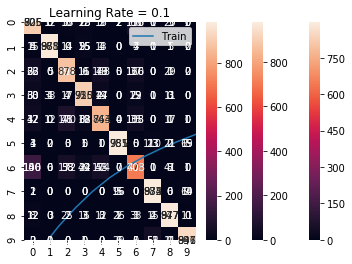

In [69]:
if __name__ == '__main__':
    
    print("Name: Madhumitha Sivasankaran\nPerson Number: 50310290")

    print("\nSingle Hidden Layer Neural Network\n")
    
    SingleHiddenLayerNeuralNetwork()
    
    print("\nMultilayer Neural Network\n")
    
    MultiLayerNeuralNetwork()
    
    print("\nConvolutional Neural Network\n")
    
    ConvolutionalNeuralnetwork()